## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [172]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [173]:
df_raw = pd.read_csv('ab_data.csv')
df_raw.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [174]:
df = df_raw.sort_index()
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [175]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [176]:
df.nunique(), df.shape[0] - df.nunique()

(user_id         290584
 timestamp       294478
 group                2
 landing_page         2
 converted            2
 dtype: int64,
 user_id           3894
 timestamp            0
 group           294476
 landing_page    294476
 converted       294476
 dtype: int64)

d. The proportion of users converted.

In [177]:
conv = df.query(' converted == 1 ')
len(conv), len(conv)/ df.shape[0]

(35237, 0.11965919355605512)

e. The number of times the `new_page` and `treatment` don't match.

In [178]:
#new_page & control

mismatch_1 = df.query(' group == "control" & landing_page == "new_page" ')
len(mismatch_1)

1928

In [179]:
#old_page & treatment, where treatment stands for experiment;

mismatch_2 = df.query(' group == "treatment" & landing_page == "old_page" ')
len(mismatch_2)

1965

In [180]:
#what about control & old page ??

mismatch_3 = df.query(' group == "control" & landing_page == "old_page"')
len(mismatch_3)

145274

In [181]:
# the question is only concerned in mismatch_1 and mismatch_2
len(mismatch_1) + len(mismatch_2)

3893

f. Do any of the rows have missing values?

In [182]:
df.isna().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [183]:
#basically, remove the mismatch rows, but what does it mean exactly?
mismatch_1.head()
type(mismatch_1)

pandas.core.frame.DataFrame

In [184]:
df2_b = df.query(' group == "treatment" & landing_page == "new_page" ')
df2_a = df.query('group == "control" & landing_page == "old_page"')

# concat the two dataframe vertically
df2 = pd.concat([df2_b, df2_a], axis=0)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [185]:
df2_b.shape, df2_a.shape, df2.shape

((145311, 5), (145274, 5), (290585, 5))

In [186]:
df2.group.unique(), df2.landing_page.unique()

(array(['treatment', 'control'], dtype=object),
 array(['new_page', 'old_page'], dtype=object))

In [187]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [188]:
#PASS#

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [189]:
df2.user_id.nunique()

290584

In [190]:
df2.shape[0]

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [191]:
df2.loc[df2.duplicated()]

,user_id,timestamp,group,landing_page,converted


In [192]:
df2.duplicated().any()

False

c. What is the row information for the repeat **user_id**? 

In [22]:
#2017-01-14 02:55:59.590927	773192	treatment	new_page	0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [193]:
df2.drop_duplicates(inplace = True)
df2.shape[0]

290585

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [24]:
p_success = df2[df2['converted']== 1]
p = len(p_success)/df2.shape[0]
q = 1 - p
p, q

(0.11959667567149027, 0.8804033243285098)

b. Given that an individual was in the `control` group, what is the probability they converted?

In [25]:
df2_cont = df2.query(' group == "control"')
p_success = df2_cont.query(' converted == 1')
p = len(p_success)/df2_cont.shape[0]
q = 1 - p
p, q

(0.1203863045004612, 0.8796136954995388)

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
df2_treat = df2.query('group == "treatment"')
p_success = df2_treat.query('converted == 1')
p = len(p_success)/df2_treat.shape[0]
q = 1 - p
p, q

(0.11880724790277405, 0.8811927520972259)

In [194]:
#Observed difference between treatment and control groups conversion rate
0.11880806551510564 - 0.1203863045004612

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [195]:
df2_new_p = df2.query(' landing_page == "new_page" ')
p = len(df2_new_p)/ len(df2)
q = 1 - p
p, q

(0.5000636646764286, 0.4999363353235714)

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

No sufficient evidence for the following reasons:
- 0.16% lower conversion rate in the treatment group than the control one
- there was enough sample size and balanced proportion for those recieving the new page to those who recieved the old one.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

#old >= new translates to;  H0:  "old - new >= 0"
#old < new translates to; H1: "old - new < 0"
#p_conversion from df2 === 0.119597 === p_conversion from df1

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [201]:
#That is the observed rate from the data before performing any hypothesis testing
#regardless of the group
conv_new = df2.query('landing_page == "new_page" & converted == 1 ')
conv_new_rate = len(conv_new)/ df2.shape[0]
conv_new_rate

0.05941118777638212

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [202]:
conv_old = df2.query('landing_page == "old_page" & converted == 1 ')
conv_old_rate = len(conv_old)/ df2.shape[0]
conv_old_rate

0.06018548789510814

In [203]:
# Difference in rates is
conv_old_rate - conv_new_rate

0.0007743001187260207

c. What is $n_{new}$, the number of individuals in the treatment group?

In [204]:
n_new = df2.query(' group == "treatment" ')
len(n_new)

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [205]:
n_old = df2.query(' group == "control" ')
len(n_old)

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [206]:
type(n_new)

pandas.core.frame.DataFrame

In [207]:
##### Bernoulli Distribution of the two outcomes of converted or not
p_new = 0.119597
new_page_converted = np.random.choice(2, size = len(n_new), p= [p_new, 1 - p_new])
new_page_converted.mean()

0.879355313775282

In [208]:
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [211]:
##### Bernoulli Distribution with the size being the different parameter
p_old = 0.119597
old_page_converted = np.random.choice(2, len(n_old), p = [p_old, 1- p_old])
old_page_converted.mean()

0.880983520795187

In [212]:
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [215]:
# The difference between the mean of the conversion is
old_page_converted.mean() - new_page_converted.mean()

0.0016282070199050702

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [78]:
##### Corrected
p_diffs_ = []
new_means_bootsample = []
old_means_bootsample = []

for i in range(10000):
    new_bootsample = np.random.choice(2, size = len(n_new), p= [p_new, 1 - p_new])
    old_bootsample = np.random.choice(2, len(n_old), p = [p_old, 1- p_old])
    new_means_bootsample.append(new_bootsample.mean())
    old_means_bootsample.append(old_bootsample.mean())
    p_diffs_.append(new_bootsample.mean() - old_bootsample.mean())
    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

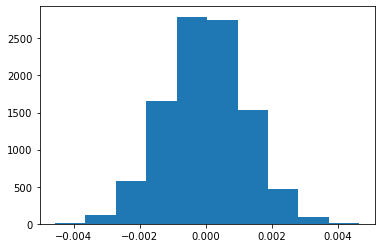

In [216]:
plt.hist(p_diffs_);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [217]:
actual_diff = df2.query(' landing_page == "new_page" ')['converted'].mean() - df2.query(' landing_page == "old_page" ')['converted'].mean()
actual_diff

-0.0015790565976871451

In [219]:
# almost 90% of the data has greater difference than the actual observed difference
p_diffs_ = np.array(p_diffs_)
(p_diffs_ > actual_diff).mean()

0.9011

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

Initially, The difference in means between conversions resulted from the old page and the new one. Followed by the proportion of these difference values which is larger than the actual difference from the data observed before the start of the experiment. Which produces a quantity between 0 and 1. Such quantity is called the p_value.

The p-value; probability of getting results same as or more extreme than the null hypothesied value a.k.a observed value.
Since this value is above 0.05 i.e. the type 1 error threshold, we fail to reject the null hypothesis assuming that the old_page attracts  the same traffic or more traffic than the new_page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [223]:
# create sub dataframes with the required filter
convert_old = df.query('landing_page == "old_page" & converted == 1').count()[1]
convert_new = df.query('landing_page == "new_page" & converted == 1').count()[1]

In [224]:
n_old = df2.landing_page.value_counts()[1]
n_new = df2.landing_page.value_counts()[0]

In [225]:
convert_old, convert_new

(17739, 17498)

In [226]:
#remember this includes participants from treatment group 
#and conotrol group jointly
n_old, n_new

(145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [227]:
#double check this paaaart!!
z_stat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance_level:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")


z_stat: 1.395, p_value: 0.163
Fail to reject the null hypothesis - we have nothing else to say


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [228]:
from scipy.stats import norm
norm.cdf(z_stat) # this measure statistical significance using the calculated z-score

0.9185040299084812

In [229]:
norm.ppf(1-(0.05/2)) # this indicates the critical value at 95% confidence interval
                    # indicating that we again fail to reject H0

1.959963984540054

**Put your answer here.**

z-score: standardised value of our statistic on a standard normal distribution.
Since the z_stat 1.395 < 1.95 we fail to reject the Null hypothesis.

p-value: probability the the null hypothesis is true, since 0.163 > 0.05 we fail to reject the Null.

Yes, they agree with the findings in parts j and k, however the p_value differ in quantity.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?



**Put your answer here.**

Logistic Regression, for Binary outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [232]:
# get_dummies for group column
# treatment = 1 and control = 0
df2['group'] = pd.get_dummies(df2['group'])

In [233]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,1,new_page,0
3,853541,2017-01-08 18:28:03.143765,1,new_page,0
6,679687,2017-01-19 03:26:46.940749,1,new_page,1
8,817355,2017-01-04 17:58:08.979471,1,new_page,1
9,839785,2017-01-15 18:11:06.610965,1,new_page,1


In [234]:
# get_dummies for landing_page column
# new_page = 1 and old_page = 0
df2['landing_page'] = pd.get_dummies(df2['landing_page'])

In [235]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,1,1,0
3,853541,2017-01-08 18:28:03.143765,1,1,0
6,679687,2017-01-19 03:26:46.940749,1,1,1
8,817355,2017-01-04 17:58:08.979471,1,1,1
9,839785,2017-01-15 18:11:06.610965,1,1,1


In [236]:
df2.drop('user_id',axis = 1 ,inplace = True)

In [237]:
df2.drop('timestamp', axis = 1, inplace = True)

In [238]:
df2.shape

(290585, 3)

In [239]:
df2.head()

,group,landing_page,converted
2,1,1,0
3,1,1,0
6,1,1,1
8,1,1,1
9,1,1,1


In [240]:
# all three columns are of type series
type(df.converted)

pandas.core.series.Series

In [241]:
# all three columns are of this shape
df.converted.shape

(294478,)

In [242]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   group         290585 non-null  uint8
 1   landing_page  290585 non-null  uint8
 2   converted     290585 non-null  int64
dtypes: int64(1), uint8(2)
memory usage: 5.0 MB


In [243]:
df2.rename(columns = {'landing_page' : 'ab_page'}, inplace = True)

In [244]:
# Add intercept and set to equal 1
df2['intercept'] = 1
df2.head()

,group,ab_page,converted,intercept
2,1,1,0,1
3,1,1,0,1
6,1,1,1,1
8,1,1,1,1
9,1,1,1,1


In [245]:
#construct the model, explain Y via X's
Y = df2['converted']
X = df2[['intercept', 'ab_page']]
logit_model = sm.Logit(Y,X)
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [246]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.6032
Date:               2021-10-25 14:48 BIC:              212801.7625
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290583           LLR p-value:      0.18965    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

[H0]: There is no correlation between the variable Y and all other explanotary variables jointly. i.e. B1 = B2 = .... = Bn = 0

Translates too: there is no correlation between conversion rate and the landing_page variable

[H1]: There exists correlation between the variable Y and at least one single variable of the X's.

Tranlsates too: there exists correlation between the conversion rate and the landing_page variable

A p-value of 0.1897 is way above our specified margin of error; being 0.05 at a 95% degree of confidence. Hence we cannot reject the Null hypothesis. Thus, There is no correlation!

Why does it differ?? Logistic regression utilisted the t-distribution for calculating p_value rather than z_distribution

In [247]:
#exponentiate parameters to calculate log odds [0,1]
np.exp(results.params)

intercept    0.136863
ab_page      0.985115
dtype: float64

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Advantages: 

-additional explanatory power to the model. 

-increased accuracy

Dis-Advantages: 

-Variance-Bias trade off, by the law of parsimony; a simple model with a moderately fair explanotary power is more prefered to a more complex model with slight additional explanotary power.

-Overfitting: over explaining the model which can result in false conclusions.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

NO, since the US and UK variables included in the regression are not statistically significant.

In [263]:
pwd

'/Users/A.R/Desktop/surfer366/1_Coding_HUB/NanoDegree/Project2/2nd_Submission'

In [264]:
# import the csv file as df
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [265]:
# three unique countries
df_country.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [266]:
# construct df2 again w/o steps taken to run previous regression in order to join df_country by id
df2_b = df.query(' group == "treatment" & landing_page == "new_page" ')
df2_a = df.query('group == "control" & landing_page == "old_page"')

# concat the two dataframe vertically
df2 = pd.concat([df2_b, df2_a], axis=0)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [267]:
# set common index
df2.set_index('user_id', inplace = True)

In [268]:
# set common index
df_country.set_index('user_id', inplace = True)

In [269]:
# Ta Da !
df_total = df2.join(df_country)
df_total.head()

,timestamp,group,landing_page,converted,country
user_id,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,US


In [270]:
# Prepare for regression, create dummy variables for country columns
df_country_codes = pd.get_dummies(df_total['country'])
df_country_codes.head()

,CA,UK,US
user_id,,,
630000,0,0,1
630001,0,0,1
630002,0,0,1
630003,0,0,1
630004,0,0,1


In [271]:
# created 3 dummies for countries
df_total_coded = pd.concat([df_total, df_country_codes], axis = 1)
df_total_coded.head()

,timestamp,group,landing_page,converted,country,CA,UK,US
user_id,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,US,0,0,1


In [272]:
# drop unnecessary columns
#df_total_coded.drop(['timestamp', 'group', 'country'], axis = 1, inplace = True)
#df_total_coded.head()

In [273]:
# get dummies for landing_page
df_total_coded['landing_page'] = pd.get_dummies(df_total_coded['landing_page'])
df_total_coded.head()

,timestamp,group,landing_page,converted,country,CA,UK,US
user_id,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,1,0,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,1,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,0,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,1,0,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,1,0,US,0,0,1


In [274]:
# rename landing_page column
df_total_coded.rename(columns = {'landing_page' : 'ab_page'}, inplace = True)

In [275]:
# add intercept for regression
df_total_coded['intercept'] = 1
df_total_coded.head()

,timestamp,group,ab_page,converted,country,CA,UK,US,intercept
user_id,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,1,0,US,0,0,1,1
630001,2017-01-16 03:16:42.560309,treatment,1,1,US,0,0,1,1
630002,2017-01-19 19:20:56.438330,control,0,0,US,0,0,1,1
630003,2017-01-12 10:09:31.510471,treatment,1,0,US,0,0,1,1
630004,2017-01-18 20:23:58.824994,treatment,1,0,US,0,0,1,1


In [280]:
# construct regression UK & US jointly
# remember to drop 1 of the dummies from df_country_codes!
Y= df_total_coded['converted']
X= df_total_coded[['intercept','ab_page', 'UK', 'US']]

Logit_model = sm.Logit(Y,X)
results = Logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [281]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.3782
Date:               2021-10-25 14:57 BIC:              212823.6968
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.17584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5159  0.1296  -0.0119   0.0934
==================================================================

"""

In [282]:
# construct regression UK & CA jointly

Y= df_total_coded['converted']
X= df_total_coded[['intercept','ab_page', 'UK', 'CA']]

Logit_model = sm.Logit(Y,X)
results = Logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [283]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.3782
Date:               2021-10-25 14:57 BIC:              212823.6968
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.17584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
==================================================================

"""

In [284]:
# construct regression CA & US jointly

Y= df_total_coded['converted']
X= df_total_coded[['intercept','ab_page', 'UK', 'CA']]

Logit_model = sm.Logit(Y,X)
results = Logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [285]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.3782
Date:               2021-10-25 14:59 BIC:              212823.6968
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.17584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
CA           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
==================================================================

"""

ab_page variable is still insignificant in predicted conversion rate reflected by p-value of 0.1910

UK, US and CA country locations seem to have also in-significant effect in predicting conversion rate!

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [286]:
df_total_coded.head()

,timestamp,group,ab_page,converted,country,CA,UK,US,intercept
user_id,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,1,0,US,0,0,1,1
630001,2017-01-16 03:16:42.560309,treatment,1,1,US,0,0,1,1
630002,2017-01-19 19:20:56.438330,control,0,0,US,0,0,1,1
630003,2017-01-12 10:09:31.510471,treatment,1,0,US,0,0,1,1
630004,2017-01-18 20:23:58.824994,treatment,1,0,US,0,0,1,1


In [287]:
#Create interaction columns
df_page_cross_US = df_total_coded['ab_page'] * df_total_coded['US']
df_page_cross_UK = df_total_coded['ab_page'] * df_total_coded['UK']
df_page_cross_CA = df_total_coded['ab_page'] * df_total_coded['CA']


df_page_cross_both = df_total_coded['ab_page'] * df_total_coded['US'] * df_total_coded['UK']

In [288]:
#The interaction would be of the form 1 * 1 = 1 and 1 * 0 = 0
df_page_cross_US.head()

user_id
630000    1
630001    1
630002    0
630003    1
630004    1
dtype: uint8

In [289]:
# add the additional interaction columns to df_total_coded
df_total_coded_much = pd.concat([df_total_coded, df_page_cross_US, df_page_cross_UK, df_page_cross_CA], axis = 1)
df_total_coded_much.head()

,timestamp,group,ab_page,converted,country,CA,UK,US,intercept,0,1,2
user_id,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,1,0,US,0,0,1,1,1,0,0
630001,2017-01-16 03:16:42.560309,treatment,1,1,US,0,0,1,1,1,0,0
630002,2017-01-19 19:20:56.438330,control,0,0,US,0,0,1,1,0,0,0
630003,2017-01-12 10:09:31.510471,treatment,1,0,US,0,0,1,1,1,0,0
630004,2017-01-18 20:23:58.824994,treatment,1,0,US,0,0,1,1,1,0,0


In [290]:
df_total_coded_much.rename(columns = {0 : 'ab * US'}, inplace = True)
df_total_coded_much.rename(columns = {1 : 'ab * UK'}, inplace = True)
df_total_coded_much.rename(columns = {2 : 'ab * CA'}, inplace = True)


df_total_coded_much.head()

,timestamp,group,ab_page,converted,country,CA,UK,US,intercept,ab * US,ab * UK,ab * CA
user_id,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,1,0,US,0,0,1,1,1,0,0
630001,2017-01-16 03:16:42.560309,treatment,1,1,US,0,0,1,1,1,0,0
630002,2017-01-19 19:20:56.438330,control,0,0,US,0,0,1,1,0,0,0
630003,2017-01-12 10:09:31.510471,treatment,1,0,US,0,0,1,1,1,0,0
630004,2017-01-18 20:23:58.824994,treatment,1,0,US,0,0,1,1,1,0,0


In [291]:
#interaction regression
Y= df_total_coded_much['converted']
X= df_total_coded_much[['intercept','ab * US', 'ab * UK', 'ab * CA']]

Logit_model_interaction = sm.Logit(Y,X)
results_interaction = Logit_model_interaction.fit()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


In [292]:
results_interaction.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212779.1904
Date:               2021-10-25 15:00 BIC:              212821.5090
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.067776   
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab * US      -0.0183    0.0126    -1.4495  0.1472  -0.0430   0.0064
ab * UK       0.0074    0.0180     0.4098  0.6819  -0.0279   0.0427
ab * CA      -0.0827    0.0380    -2.1763  0.0295  -0.1571  -0.0082
==================================================================

"""

we would now like to look at an interaction between page and country to see if there significant effects on conversion??

Interesting results, it seems that the interaction effect between the country Canada  and the landing page is significant at a p_value of 0.03 < 0.05 !!

The effect of interaction between the (page * country) is still insignificant on the converstion rate, except for Canada!

# Summary of the findings

Based on initial descriptive statistics, we would expect no significant difference regarding the influence of the page variable on the conversion rate. Additionally, the treatment group variable also had no significance difference on the conversion rate; with an observed difference of 0.157%. At first glance, the discrepancy seems to be minimal.


Based on the process of statistical hypothesis testing; executed first via manual construction and secondly via modules from the stats.models library; there does not exists a statistically significant difference between the conversion rates of the two pages. The Null hypothesis being that the old_page has an equal or higher conversion rate than the new_page therefore stands out to be true (cannot be rejected); Which is in line to initial descriptive statistics. The calculated p_value is 0.163.


A/B testing through Logistic Regression:
- Uni-Variate regression: measuring the effect of the ab_page on conversion rate. Verdict; statistically insignificant. The p_value of ab_page is 0.1897

-	Multi-Variate regression, ab_page and 3 combinations of countries: measuring the effect of ab_page and country wise effect of three variables being US, UK and CA. Out of the three p_values, UK country effect has the largest significance. However,the three variables are jointly insignificant.

-	Multi-Variate regression of interaction effects: employing the three interaction  varaibles being (ab_page x US), (ab_page x UK), (ab_page x CA). The p_values of the  cross variables are 0.1472, 0.6819 and finally 0.03. Hence, its safe to say that the interaction effects are of US and UK are insignificant.

- According to the regression analysis; Canada is the country where transforming to a new_page would be a worthy investment decision; given that it's interaction effect with the landing page is a significant variable. Whereas for The US and UK the old_page seems to be doing ok and no futher investment is required for modifying into a new_page.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])